In [72]:
import pandas as pd

# Load the Excel file
file_path = 'CRE_Data_SpringA2025.xlsx'
sheets = pd.read_excel(file_path, sheet_name=None)

# Load relevant sheets
buildings = sheets['Buildings']
financials = sheets['Financials']
equity = sheets['Equity']

# Step 1: Calculate Vacancy Rate (%) and Operating Expense Ratio (%)
financials['Vacancy Rate'] = (financials['Lost Rent'] / financials['Gross Rental Income']) * 100
financials['Operating Expense Ratio'] = (financials['Operating Expenses'] / financials['Effective Gross Income']) * 100

# Step 2: Calculate Equity Value Growth (%)
equity['Equity Value Growth'] = ((equity['Equity Reversion'] / equity['Initial Equity Investment']) - 1) * 100

# Step 3: Calculate Rent CAGR (%) per building (Year 1 to Year 5)
rent_by_year = financials.pivot_table(index=['City', 'Building ID'], columns='Year', values='Gross Rental Income')
rent_by_year['Rent CAGR'] = ((rent_by_year[5] / rent_by_year[1])**(1/4) - 1) * 100
rent_cagr = rent_by_year[['Rent CAGR']].reset_index()

# Step 4: Aggregate financial data (vacancy rate, expense ratio, NOI) by building
building_metrics = financials.groupby(['City', 'Building ID']).agg({
    'Vacancy Rate': 'mean',
    'Operating Expense Ratio': 'mean',
    'Net Operating Income': 'mean'
}).reset_index()

# Step 5: Merge building metrics with equity growth
equity = equity.rename(columns={'Building': 'Building ID'})
building_summary = building_metrics.merge(
    equity[['City', 'Building ID', 'Equity Value Growth']],
    on=['City', 'Building ID']
)

# Step 6: Merge with Rent CAGR
building_summary = building_summary.merge(rent_cagr, on=['City', 'Building ID'])

# Step 7: Merge with Building Class from Buildings sheet
buildings_class = buildings[['City', 'Building ID', 'Class']]
building_summary = building_summary.merge(buildings_class, on=['City', 'Building ID'], how='left')



# Final cleanup before display/export
building_summary = building_summary[['City', 'Building ID', 'Class',
                                     'Vacancy Rate', 'Operating Expense Ratio',
                                     'Net Operating Income',
                                     'Equity Value Growth', 'Rent CAGR']]


# Round all percentages (optional, but cleaner for reporting)
building_summary = building_summary.round({
    'Vacancy Rate': 2,
    'Operating Expense Ratio': 2,
    'Equity Value Growth': 2,
    'Rent CAGR': 2
})

# Final display
print(building_summary.head(10))

# Optional: Save to Excel
building_summary.to_excel('Building_Summary_with_Class.xlsx', index=False)


       City  Building ID Class  Vacancy Rate  Operating Expense Ratio  \
0  Fairview       101976     A         11.72                    62.11   
1  Fairview       102333     A         11.97                    51.24   
2  Fairview       103727     C          5.59                    50.78   
3  Fairview       109402     A         12.42                    60.21   
4  Fairview       129578     B         12.71                    58.85   
5  Fairview       142900     B         11.96                    58.60   
6  Fairview       175239     A         14.02                    50.26   
7  Fairview       177715     A          6.22                    59.17   
8  Fairview       178148     A          5.41                    62.35   
9  Fairview       192939     C         11.82                    63.08   

   Net Operating Income  Equity Value Growth  Rent CAGR  
0          1.727238e+06                 6.75        5.0  
1          1.766783e+06                 5.76        5.0  
2          5.363336e+0

In [73]:
#for checking
target_building = building_summary[(building_summary['City'] == 'New Hope') & 
                                   (building_summary['Building ID'] == 845258)]

In [74]:
#for checking
print(target_building)

         City  Building ID Class  Vacancy Rate  Operating Expense Ratio  \
187  New Hope       845258     B         11.33                    46.63   

     Net Operating Income  Equity Value Growth  Rent CAGR  
187          1.355422e+06                 9.28        6.0  


In [75]:
#Aggregate to city level (final result)
city_summary = building_summary.groupby('City').agg({
    'Vacancy Rate': 'mean',
    'Operating Expense Ratio': 'mean',
    'Net Operating Income': 'mean',
    'Equity Value Growth': 'mean',
    'Rent CAGR': 'mean'
}).reset_index()

#Format Net Operating Income with commas for readability
city_summary['Net Operating Income'] = city_summary['Net Operating Income'].apply(lambda x: f'{x:,.0f}')

#Round percentages to 2 decimal places
for col in ['Vacancy Rate', 'Operating Expense Ratio', 'Equity Value Growth', 'Rent CAGR']:
    city_summary[col] = city_summary[col].round(2)

#Save to Excel (optional)
city_summary.to_excel('Market_Selection_Analysis.xlsx', index=False)

# Step 12: Print result to console (optional)
print(city_summary)

          City  Vacancy Rate  Operating Expense Ratio Net Operating Income  \
0     Fairview          9.86                    57.37              906,159   
1     New Hope         10.18                    50.48            1,108,207   
2  Springfield         10.08                    52.01              962,399   

   Equity Value Growth  Rent CAGR  
0                 6.10        5.0  
1                 7.94        6.0  
2                 4.96        1.0  


In [76]:
# Filter to Class B only
building_summary = building_summary[building_summary['Class'] == 'B']

# Now calculate city-level metrics only for Class B buildings
city_summary = building_summary.groupby('City').agg({
    'Vacancy Rate': 'mean',
    'Operating Expense Ratio': 'mean',
    'Net Operating Income': 'mean',
    'Equity Value Growth': 'mean',
    'Rent CAGR': 'mean'
}).reset_index()

# Format Net Operating Income for display (optional, after aggregation)
city_summary['Net Operating Income'] = city_summary['Net Operating Income'].apply(lambda x: f'{x:,.0f}')

# Round percentages (optional)
for col in ['Vacancy Rate', 'Operating Expense Ratio', 'Equity Value Growth', 'Rent CAGR']:
    city_summary[col] = city_summary[col].round(2)


In [77]:
print(city_summary)

          City  Vacancy Rate  Operating Expense Ratio Net Operating Income  \
0     Fairview          9.72                    57.56              875,193   
1     New Hope         10.01                    50.26            1,160,120   
2  Springfield         10.25                    52.05              940,730   

   Equity Value Growth  Rent CAGR  
0                 6.16        5.0  
1                 7.94        6.0  
2                 4.94        1.0  


In [78]:
import pandas as pd

# Load the Excel file
file_path = 'CRE_Data_SpringA2025.xlsx'  # Make sure this file is in the same folder
sheets = pd.read_excel(file_path, sheet_name=None)

# Load relevant sheets
buildings = sheets['Buildings']
financials = sheets['Financials']
equity = sheets['Equity']

# Calculate vacancy rate & operating expense ratio for each building-year
financials['Vacancy Rate'] = (financials['Lost Rent'] / financials['Gross Rental Income']) * 100
financials['Operating Expense Ratio'] = (financials['Operating Expenses'] / financials['Effective Gross Income']) * 100

# Calculate Equity Value Growth for each building (only 1 row per building in equity sheet)
equity['Equity Value Growth'] = ((equity['Equity Reversion'] / equity['Initial Equity Investment']) - 1) * 100

# Calculate Rent CAGR for each building (5 years of data available)
rent_by_year = financials.pivot_table(index=['City', 'Building ID'], columns='Year', values='Gross Rental Income')
rent_by_year['Rent CAGR'] = ((rent_by_year[5] / rent_by_year[1])**(1/4) - 1) * 100
rent_cagr = rent_by_year[['Rent CAGR']].reset_index()

# Aggregate financials to building level (average over 5 years)
building_metrics = financials.groupby(['City', 'Building ID']).agg({
    'Vacancy Rate': 'mean',
    'Operating Expense Ratio': 'mean',
    'Net Operating Income': 'mean'
}).reset_index()

# Combine all building-level data into one summary DataFrame
equity = equity.rename(columns={'Building': 'Building ID'})
building_summary = building_metrics.merge(
    equity[['City', 'Building ID', 'Equity Value Growth']],
    on=['City', 'Building ID']
)
building_summary = building_summary.merge(rent_cagr, on=['City', 'Building ID'])
building_summary = building_summary.merge(
    buildings[['City', 'Building ID', 'Class']],
    on=['City', 'Building ID']
)

# Filter to Class B only (Skyline's focus)
building_summary_B = building_summary[building_summary['Class'] == 'B']

# Risk Metrics (we will exclude Rent CAGR since it's constant within cities as discussed earlier)
risk_metrics = ['Vacancy Rate', 'Operating Expense Ratio', 'Net Operating Income', 'Equity Value Growth']

# Group by City to calculate Mean & Standard Deviation for each metric
risk_table = building_summary_B.groupby('City')[risk_metrics].agg(['mean', 'std']).reset_index()

# Calculate Coefficient of Variation (CV) = Standard Deviation / Mean
for metric in ['Vacancy Rate', 'Operating Expense Ratio', 'Equity Value Growth']:
    risk_table[(metric, 'CV')] = risk_table[(metric, 'std')] / risk_table[(metric, 'mean')]

# Clean up column names for readability
risk_table.columns = ['_'.join(col).strip() for col in risk_table.columns.values]
risk_table = risk_table.rename(columns={'City_': 'City'})

# Extract only the columns we care about for the slide
risk_factors = risk_table[[
    'City',
    'Vacancy Rate_CV', 
    'Operating Expense Ratio_CV', 
    'Equity Value Growth_CV',
    'Net Operating Income_std'
]]

# Rename for presentation clarity
risk_factors = risk_factors.rename(columns={
    'Vacancy Rate_CV': 'Vacancy Rate CV',
    'Operating Expense Ratio_CV': 'Operating Expense Ratio CV',
    'Equity Value Growth_CV': 'Equity Value Growth CV',
    'Net Operating Income_std': 'NOI Standard Deviation'
})

# Optional: Round for clean display
risk_factors = risk_factors.round(4)

# Display result in console
print(risk_factors)

# Optional: Save to Excel for your slide preparation
risk_factors.to_excel('ClassB_Risk_Factors_Analysis.xlsx', index=False)


          City  Vacancy Rate CV  Operating Expense Ratio CV  \
0     Fairview           0.3038                      0.0658   
1     New Hope           0.3151                      0.0912   
2  Springfield           0.2985                      0.0882   

   Equity Value Growth CV  NOI Standard Deviation  
0                  0.1189             254275.1614  
1                  0.1444             318842.7553  
2                  0.1345             260746.9409  


Monte Carlo Simulation Results (after 10000 simulations):
Average Studios: 55.00
Average 1-Bedrooms: 30.00
Expected Annual Revenue: $2,255,250
Expected Operating Cost: $1,154,881
Expected Annual Profit (NOI): $1,100,369
Profit Volatility (Std Dev): $86,130


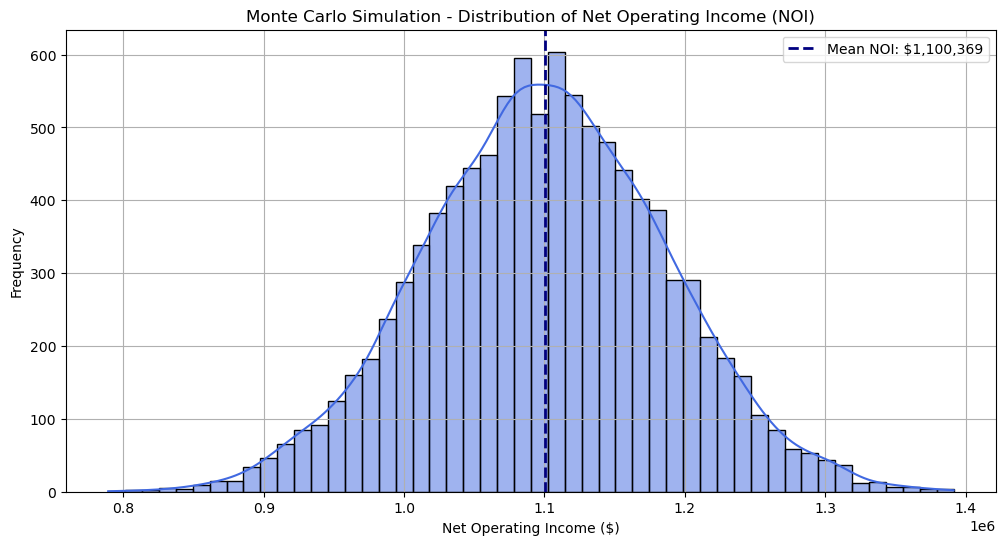

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linprog

# Set random seed for reproducibility
np.random.seed(478)

# Define key constraints
num_units = 85                    # Total number of units
max_floor_space = 80000            # Total available floor space (sq. ft.)
studio_size = 800                   # Studio unit size (sq. ft.)
bedroom_size = 1200                 # 1-Bedroom unit size (sq. ft.)

# Operating Costs (per year)
fixed_costs = 320000                # Fixed costs per year
studio_var_cost = 720 * 12          # Annual variable cost per studio
bedroom_var_cost = 1000 * 12        # Annual variable cost per 1-bedroom

# Equality Constraints (Units + Floor space)
A_eq = [
    [1, 1],                         # Total units constraint: Studios + 1-Bedrooms = 85
    [studio_size, bedroom_size]     # Floor space constraint: 800x + 1200y <= 80,000
]
b_eq = [num_units, max_floor_space]

# Bounds (allowing any feasible mix of units)
bounds = [(0, None), (0, None)]     # No upper limit (market cap not applied in this version)

# Historical Average Rents (from New Hope Class B data)
avg_studio_rent = 2000               # Update with actual average rent
avg_bedroom_rent = 2600               # Update with actual average rent

# Define function for Monte Carlo Optimization
def monte_carlo_optimization(num_simulations=10000):
    # Generate random variations for rent and costs (assume normal distribution)
    studio_rent_sim = np.random.normal(avg_studio_rent, avg_studio_rent * 0.05, num_simulations) * 12  # Annual
    bedroom_rent_sim = np.random.normal(avg_bedroom_rent, avg_bedroom_rent * 0.05, num_simulations) * 12  # Annual

    studio_cost_sim = np.random.normal(studio_var_cost, studio_var_cost * 0.05, num_simulations)
    bedroom_cost_sim = np.random.normal(bedroom_var_cost, bedroom_var_cost * 0.05, num_simulations)

    # Store results for optimal unit mix per simulation
    optimal_studio_counts = []
    optimal_bedroom_counts = []
    annual_revenues = []
    operating_costs = []
    noi_simulations = []

    for i in range(num_simulations):
        # Objective Function: Minimize -Profit (equivalent to maximizing profit)
        c = [-studio_rent_sim[i] + studio_cost_sim[i], -bedroom_rent_sim[i] + bedroom_cost_sim[i]]

        # Solve Linear Program for each simulation (to find optimal unit mix)
        result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

        if result.success:
            studios = result.x[0]
            bedrooms = result.x[1]

            # Calculate Annual Revenue
            revenue = (studios * studio_rent_sim[i]) + (bedrooms * bedroom_rent_sim[i])

            # Calculate Operating Cost
            cost = fixed_costs + (studios * studio_cost_sim[i]) + (bedrooms * bedroom_cost_sim[i])

            # Calculate Annual Profit (NOI)
            profit = revenue - cost

            # Store all results
            optimal_studio_counts.append(studios)
            optimal_bedroom_counts.append(bedrooms)
            annual_revenues.append(revenue)
            operating_costs.append(cost)
            noi_simulations.append(profit)

    # Convert to array for statistics
    optimal_studio_counts = np.array(optimal_studio_counts)
    optimal_bedroom_counts = np.array(optimal_bedroom_counts)
    annual_revenues = np.array(annual_revenues)
    operating_costs = np.array(operating_costs)
    noi_simulations = np.array(noi_simulations)

    # Calculate mean NOI
    mean_noi = np.mean(noi_simulations)

    # Print Summary Stats
    print(f"Monte Carlo Simulation Results (after {num_simulations} simulations):")
    print(f"Average Studios: {optimal_studio_counts.mean():.2f}")
    print(f"Average 1-Bedrooms: {optimal_bedroom_counts.mean():.2f}")
    print(f"Expected Annual Revenue: ${annual_revenues.mean():,.0f}")
    print(f"Expected Operating Cost: ${operating_costs.mean():,.0f}")
    print(f"Expected Annual Profit (NOI): ${mean_noi:,.0f}")
    print(f"Profit Volatility (Std Dev): ${noi_simulations.std():,.0f}")

    # Plot Distribution of NOI (with blue bars)
    plt.figure(figsize=(12, 6))
    sns.histplot(noi_simulations, bins=50, color='royalblue', kde=True)

    # Add mean NOI as a vertical navy line
    plt.axvline(mean_noi, color='navy', linestyle='--', linewidth=2, label=f'Mean NOI: ${mean_noi:,.0f}')

    plt.title("Monte Carlo Simulation - Distribution of Net Operating Income (NOI)")
    plt.xlabel("Net Operating Income ($)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the simulation
monte_carlo_optimization()
